# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [1]:
# Your import
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data = pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [7]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# Select all features + derived  
# target: Legendary 
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs', 'capture_rt',
            'sp_attack_to_sp_defense_ratio', 'type']
target = 'legendary'

X = pokemon_data[features] # feature matrix of defined features from the dataset
y = pokemon_data[target] # target vector of the target column from the dataset

In [15]:
X

,attack,defense,sp_attack,sp_defense,speed,total_bs,capture_rt,sp_attack_to_sp_defense_ratio,type
0,49,49,65,65,45,318,45,1.000000,grass
1,62,63,80,80,60,405,45,1.000000,grass
2,100,123,122,120,80,625,45,1.016667,grass
3,52,43,60,50,65,309,45,1.200000,fire
4,64,58,80,65,80,405,45,1.230769,fire
...,...,...,...,...,...,...,...,...,...
796,101,103,107,101,61,570,25,1.059406,steel
797,181,131,59,31,109,570,255,1.903226,grass
798,101,53,97,53,43,570,15,1.830189,dark
799,107,101,127,89,79,600,3,1.426966,psychic


### 2.2 Data Transformation Using ColumnTransformer

In [21]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler

# Categorical and numerical columns
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
numeric_transformer = MaxAbsScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [23]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

In [25]:
# Your import
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.40384615, 0.74509804, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.52564103, 0.17647059, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.68589744, 0.17647059, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=300, random_state=42)
logistic_model.fit(X_train, y_train)

# Train Logistic Regression
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)


print("Yarixa + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Yarixa + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [31]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

# Train MLP Classifier
y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]

# Evaluate MLP Classifier
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Yarixa + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Yarixa + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9873
Validation accuracy: 0.9750


C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Please record your loss of logistic regression with 500 iterations
# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter = 1,      # run one iteration at a time
    solver = 'saga',   # the saga solver supports recording loss values during optimization
    random_state = 42,
    warm_start = True  # continue training from the last state, which allow manually record the loss at each iteration
)

# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(1, 501): # 500 iterations
    logistic_model.fit(X_train, y_train) # fit one iteration
    y_train_prob = logistic_model.predict_proba(X_train) # predict probabilities to calculate log loss
    loss = log_loss(y_train, y_train_prob) # calculate the log loss and append to the loss curve
    loss_curve.append(loss)

C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

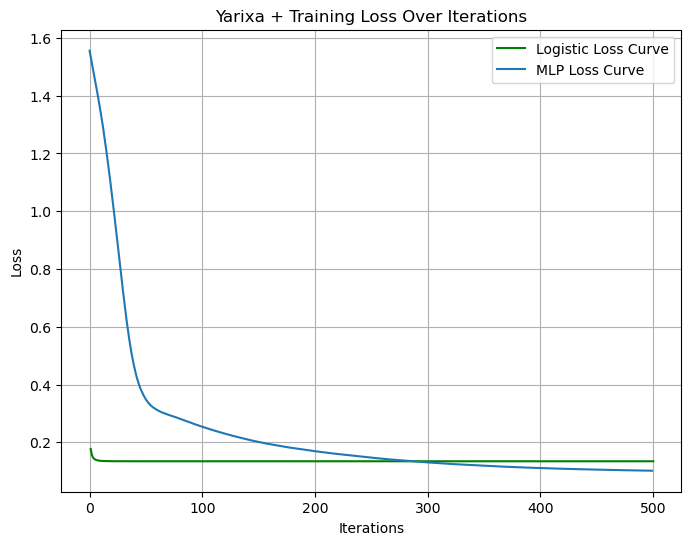

In [41]:
# Extract loss during MLP training
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label = 'Logistic Loss Curve', color = 'green')
plt.plot(mlp_model_loss_curve, label = 'MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Yarixa + Training Loss Over Iterations')
plt.grid()
plt.legend()
plt.show()

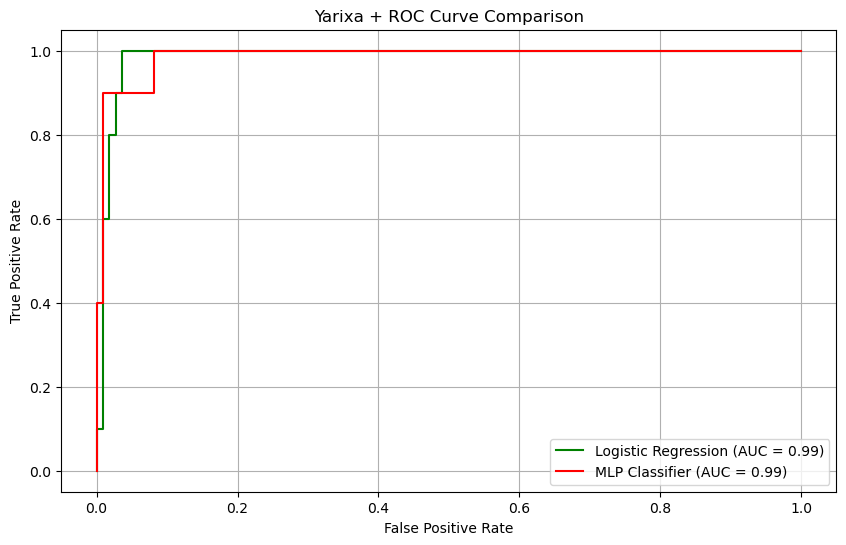

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC Curve Comparison
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)

# Plot ROC curves
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label = f'Logistic Regression (AUC = {auc_val_logistic:.2f})', color = 'green')
plt.plot(fpr_mlp, tpr_mlp, label = f'MLP Classifier (AUC = {auc_val_mlp:.2f})', color = 'red')
plt.title('Yarixa + ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
# Your idea:
# logistic regression is simple but performs better on well-processed datasets
# mlp uses a neural network structure and offers potentially improved outcomes with complex data
# auc-roc curves are good for evaluating and comparing classification performance of models across different thresholds

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

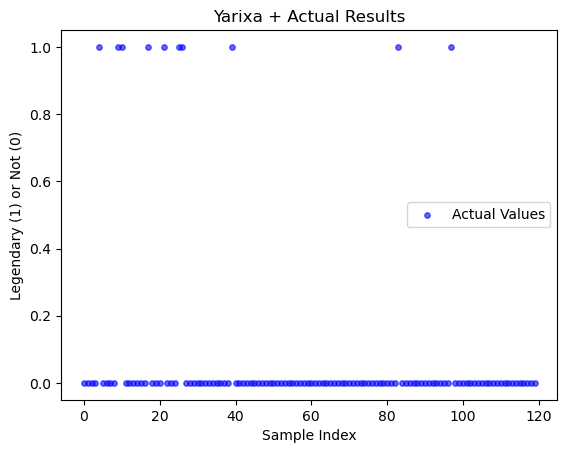

In [53]:
# Please plot the Actual data and Predicted for Logistic and MLP model
plt.scatter(range(len(y_val)), y_val, color = 'blue', alpha = 0.6, label = 'Actual Values', s = 15)
plt.title('Yarixa + Actual Results')
plt.xlabel('Sample Index')
plt.ylabel('Legendary (1) or Not (0)')
plt.legend()
plt.show()

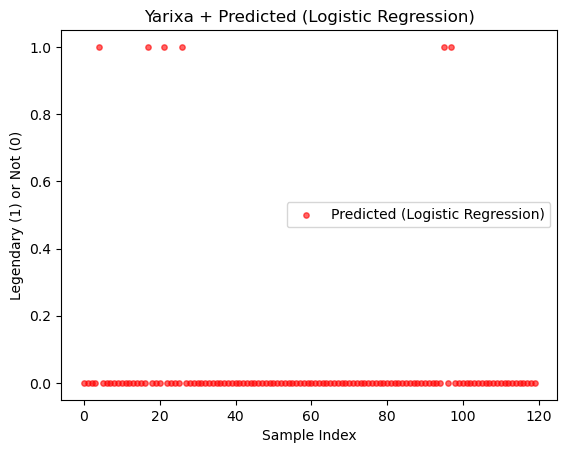

In [59]:
plt.scatter(range(len(y_val)), y_val_pred_logistic, color = 'red', alpha = 0.6, label = 'Predicted (Logistic Regression)', s = 15)
plt.title('Yarixa + Predicted (Logistic Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Legendary (1) or Not (0)')
plt.legend()
plt.show()

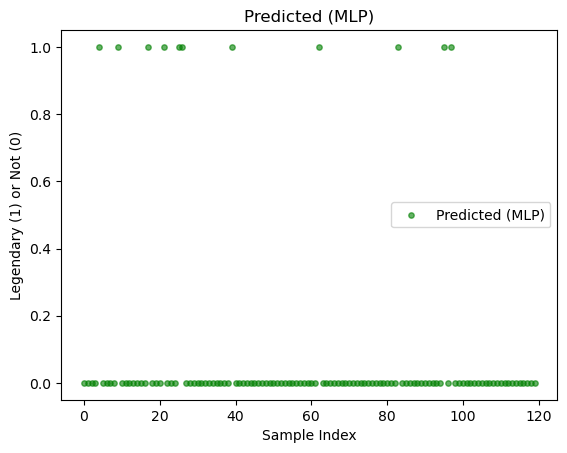

In [63]:
plt.scatter(range(len(y_val)), y_val_pred_mlp, color = 'green', alpha = 0.6, label = 'Predicted (MLP)', s = 15)
plt.title('Predicted (MLP)')
plt.xlabel('Sample Index')
plt.ylabel('Legendary (1) or Not (0)')
plt.legend()

### Confusion Matrices

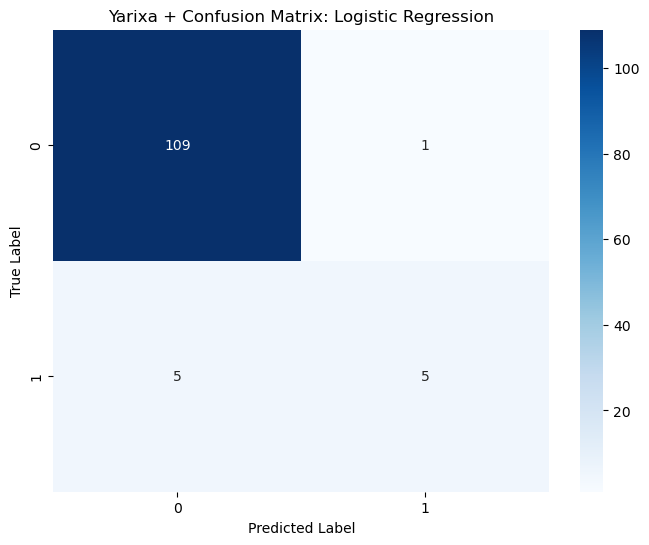

In [71]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Logistic Regression
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize = (8, 6))
sns.heatmap(cm_logistic, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Yarixa + Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

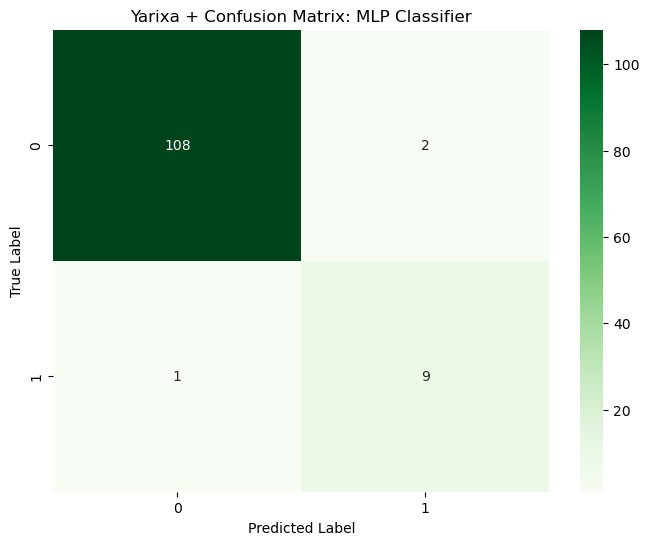

In [73]:
# plot MLP
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize = (8, 6))
sns.heatmap(cm_mlp, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Yarixa + Confusion Matrix: MLP Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion

In [75]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# the logistic regression and confusion matrix predicted label has less than the true label for the 00 quadrant, meaning the predictions were off for both.
# they also almost have the same value for the 00 quadrant, differing only by one. the main difference is their results in the rest of the quadrants are
# different across both models and compared to the actual results, have different values than the predicted results.